<a href="https://colab.research.google.com/github/AbdulrahmanAhmed123/Student_Depresion/blob/main/Project_DEPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
dep=pd.read_csv("student_depression_dataset.csv")

  ## **Prepare** **Data** **&&** **Cleanning**

  ---
  ---


In [3]:
dep.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:


dep.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


In [5]:
dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
dep.drop(dep[dep['Financial Stress']=='?'].index,inplace=True)
dep[dep['Financial Stress']=='?']
dep['Work/Study Hours']=dep['Work/Study Hours'].astype(int)
type(dep['Work/Study Hours'].dtype)

numpy.dtypes.Int64DType

In [7]:
dep["Age"].sort_values()

,Age
26320,18.0
26318,18.0
3202,18.0
14770,18.0
14769,18.0
...,...
4386,51.0
13499,54.0
14819,56.0
2909,58.0


In [8]:
dep['Financial Stress'] = dep['Financial Stress'].astype(float).astype(int)
dep['Financial Stress']

,Financial Stress
0,1
1,2
2,1
3,5
4,1
...,...
27896,1
27897,3
27898,2
27899,5


In [9]:
dep["City"].unique()


array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', "'Less Delhi'",
       'City', '3.0', "'Less than 5 Kalyan'", 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [10]:
dep.drop(dep[dep["City"]=="3.0"].index,inplace=True)
dep[dep["City"]=="3.0"]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [11]:
dep.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27897.000000,27897.000000,27897.000000,27897.000000,27897.000000,27897.000000,27897.000000,27897.000000,27897.000000,27897.000000
mean,70444.212819,25.822346,3.141341,0.000430,7.656123,2.943937,0.000681,7.156433,3.139800,0.585511
std,40642.199113,4.905654,1.381487,0.043995,1.470722,1.361131,0.044398,3.707593,1.437329,0.492642
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70694.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105827.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [12]:
dep=dep.drop(columns=["id"],axis=1)

In [13]:
dep.to_csv('dep_stud.csv', sep=',', index=False, na_rep='Missing')

In [14]:
depp=pd.read_csv("dep_stud.csv")
depp.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [15]:
depp["Financial Stress"].unique()

array([1, 2, 5, 3, 4])

In [16]:
dep.isnull().sum()

,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0


In [17]:
dep.duplicated().sum()

np.int64(0)

In [18]:
dep.describe(include="object")

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27897,27897,27897,27897,27897,27897,27897,27897
unique,2,51,14,5,4,28,2,2
top,Male,Kalyan,Student,'Less than 5 hours',Unhealthy,'Class 12',Yes,No
freq,15546,1570,27866,8309,10315,6080,17655,14396


# **Remove Outlier----------**


In [19]:
def remove_outlier(df,col):
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  upper=Q3+1.5*IQR
  lower=Q1-1.5*IQR
  dep_caa=dep[(dep[col]>lower) & (dep[col]<upper)]
  return dep_caa


In [20]:
dep_ca=remove_outlier(dep,"CGPA")
dep_caa=remove_outlier(dep_ca,"Age")

dep_caa.Age.value_counts()

,count
Age,
24.0,2258
20.0,2236
28.0,2133
29.0,1949
33.0,1893
25.0,1784
21.0,1725
23.0,1645
18.0,1587


<Axes: xlabel='Age'>

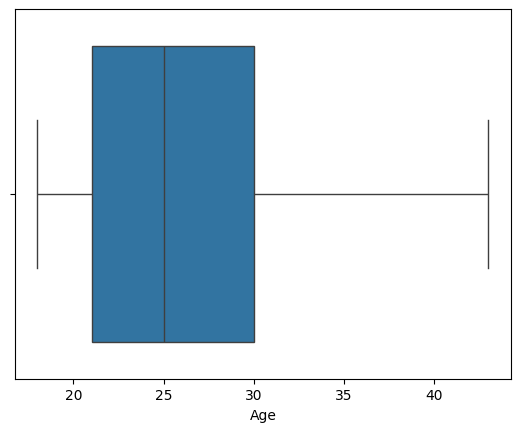

In [21]:

sns.boxplot(x=dep_caa["Age"])

<Axes: xlabel='CGPA'>

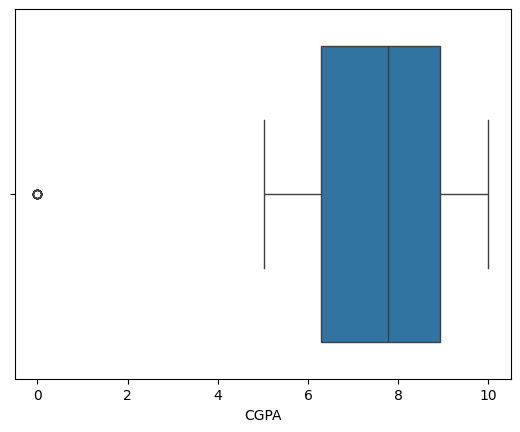

In [22]:
sns.boxplot(x=dep_caa["CGPA"])

<Axes: xlabel='CGPA'>

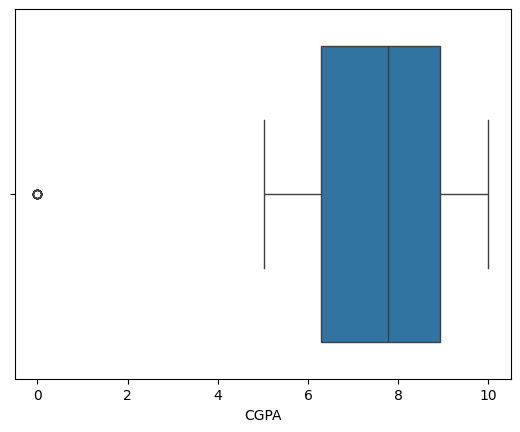

In [23]:
sns.boxplot(x=dep_caa["CGPA"])

<Axes: xlabel='Job Satisfaction'>

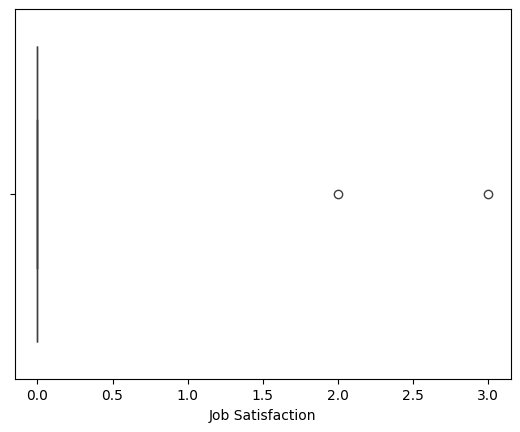

In [24]:
sns.boxplot(x=dep_ca["Job Satisfaction"])

In [25]:
dep_caaa=dep_caa.rename(columns={"Have you ever had suicidal thoughts ?":"suicide"})
dep_caaa=dep_caa.rename(columns={"Family History of Mental Illness":"Mental Illness"})
print(dep_caaa)



       Gender   Age           City Profession  Academic Pressure  \
0        Male  33.0  Visakhapatnam    Student                5.0   
1      Female  24.0      Bangalore    Student                2.0   
2        Male  31.0       Srinagar    Student                3.0   
3      Female  28.0       Varanasi    Student                3.0   
4      Female  25.0         Jaipur    Student                4.0   
...       ...   ...            ...        ...                ...   
27896  Female  27.0          Surat    Student                5.0   
27897    Male  27.0       Ludhiana    Student                2.0   
27898    Male  31.0      Faridabad    Student                3.0   
27899  Female  18.0       Ludhiana    Student                5.0   
27900    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90                 5.0 

In [26]:
dep_caaa.to_csv('Final_dep_stud.csv', sep=',', index=False, na_rep='Missing')

dep_caaa.select_dtypes("object")

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Mental Illness
0,Male,Visakhapatnam,Student,'5-6 hours',Healthy,B.Pharm,Yes,No
1,Female,Bangalore,Student,'5-6 hours',Moderate,BSc,No,Yes
2,Male,Srinagar,Student,'Less than 5 hours',Healthy,BA,No,Yes
3,Female,Varanasi,Student,'7-8 hours',Moderate,BCA,Yes,Yes
4,Female,Jaipur,Student,'5-6 hours',Moderate,M.Tech,Yes,No
...,...,...,...,...,...,...,...,...
27896,Female,Surat,Student,'5-6 hours',Unhealthy,'Class 12',Yes,Yes
27897,Male,Ludhiana,Student,'Less than 5 hours',Healthy,MSc,No,Yes
27898,Male,Faridabad,Student,'5-6 hours',Unhealthy,MD,No,No
27899,Female,Ludhiana,Student,'Less than 5 hours',Healthy,'Class 12',Yes,No


# **Pre-processing**



---



---




In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Categories_Columns=dep_caaa.select_dtypes("object")
for cat_colm in Categories_Columns.columns:
  dep_caaa[cat_colm]=le.fit_transform(Categories_Columns[cat_colm])
# dep_ca.loc[:,"Gender"]=le.fit_transform(dep_ca.loc[:,"Gender"])
# dep_ca.loc[:,"City"]=le.fit_transform(dep_ca.loc[:,"City"])
# dep_ca.loc[:,"suicide"]=le.fit_transform(dep_ca.loc[:,"suicide"])
# dep_ca.loc[:,"Profession"]=le.fit_transform(dep_ca.loc[:,"Profession"])
# dep_ca.loc[:,"Mental Illness"]=le.fit_transform(dep_ca.loc[:,"Mental Illness"])
# dep_ca.loc[:,"Degree"]=le.fit_transform(dep_ca.loc[:,"Degree"])
# dep_ca.loc[:,"Dietary Habits"]=le.fit_transform(dep_ca.loc[:,"Dietary Habits"])
# dep_ca.loc[:,"Sleep Duration"]=le.fit_transform(dep_ca.loc[:,"Sleep Duration"])



In [28]:
dep_caaa.corr()["Depression"]



,Depression
Gender,0.001786
Age,-0.225886
City,-0.024543
Profession,-0.016993
Academic Pressure,0.474819
Work Pressure,-0.003356
CGPA,0.022372
Study Satisfaction,-0.168085
Job Satisfaction,-0.003489
Sleep Duration,-0.022437


In [29]:

dep_caaa=dep_caaa.drop(columns=["Work Pressure"],axis=1)

dep_caaa

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Mental Illness,Depression
0,1,33.0,50,12,5.0,8.97,2.0,0.0,0,0,4,1,3,1,0,1
1,0,24.0,4,12,2.0,5.90,5.0,0.0,0,1,11,0,3,2,1,0
2,1,31.0,43,12,3.0,7.03,5.0,0.0,2,0,6,0,9,1,1,0
3,0,28.0,48,12,3.0,5.59,2.0,0.0,1,1,8,1,4,5,1,1
4,0,25.0,17,12,4.0,8.13,3.0,0.0,0,1,17,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,44,12,5.0,5.75,5.0,0.0,0,3,0,1,7,1,1,0
27897,1,27.0,24,12,2.0,9.40,3.0,0.0,2,0,25,0,0,3,1,0
27898,1,31.0,10,12,3.0,6.61,4.0,0.0,0,3,22,0,12,2,0,0
27899,0,18.0,24,12,5.0,6.88,2.0,0.0,2,0,0,1,10,5,0,1


<Axes: >

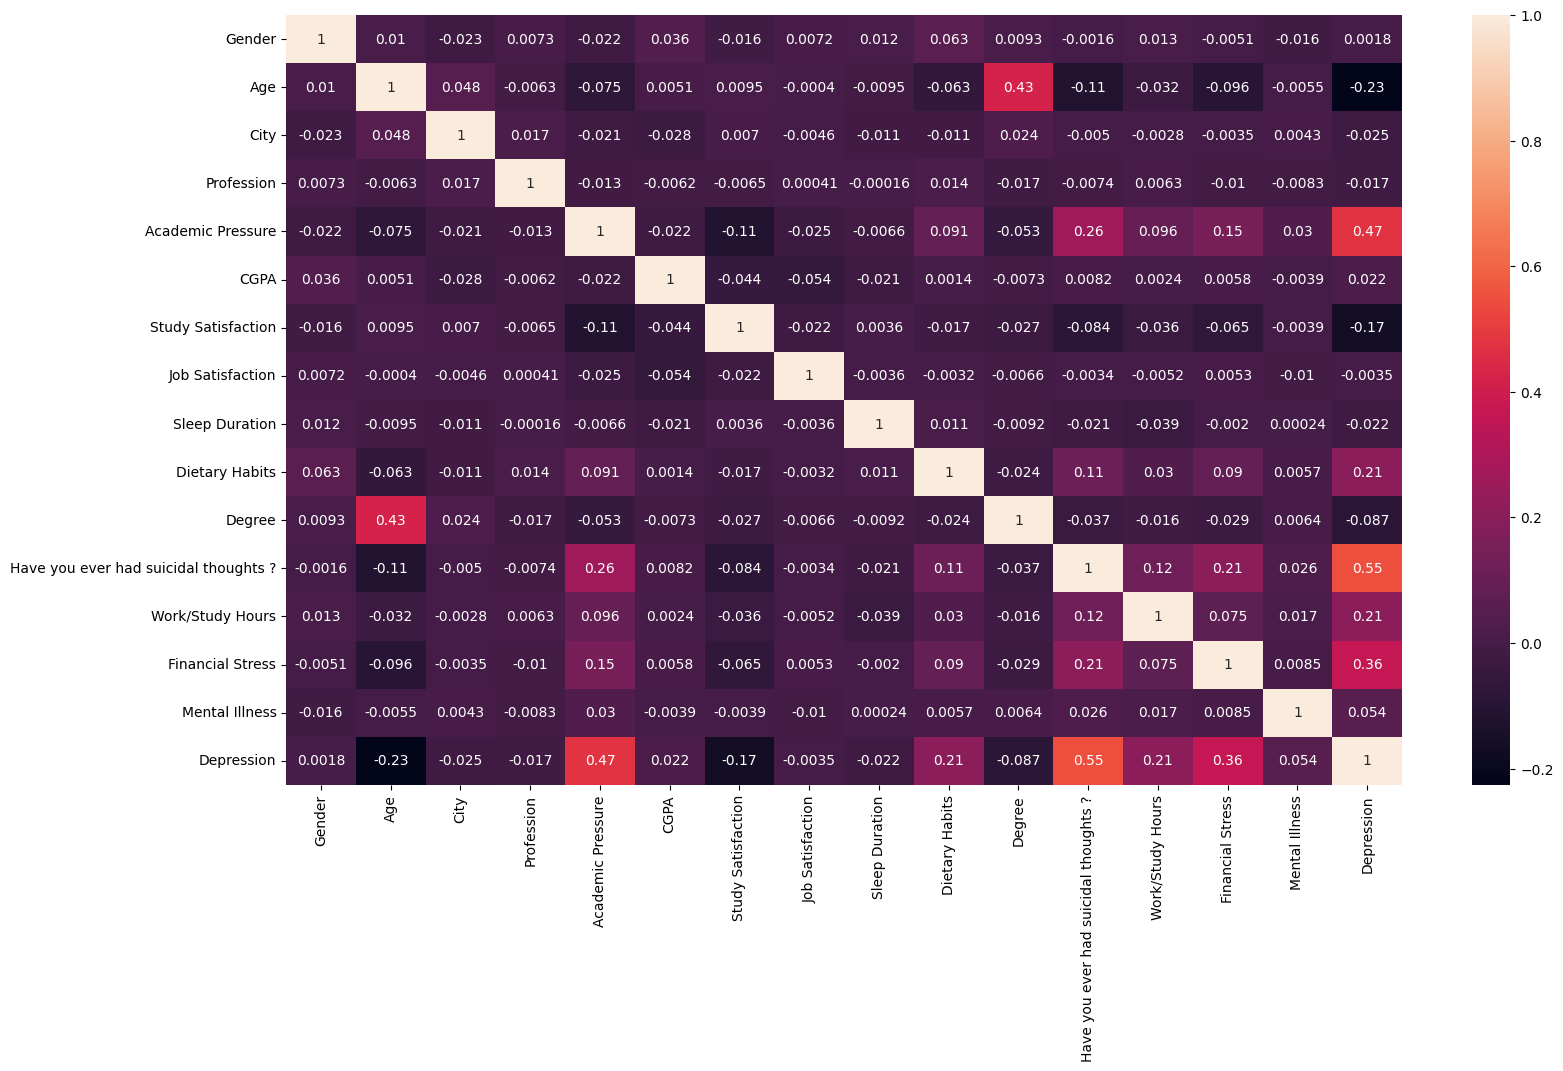

In [30]:
plt.figure(figsize=(18,10))
sns.heatmap(dep_caaa.corr(),annot=True)

# Train & Test ML Model


---



---



In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dep_caaa.drop("Depression",axis=1),dep_caaa["Depression"],test_size=0.25,random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
lg.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, ..., 0, 1, 1])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      2879
           1       0.85      0.89      0.87      4093

    accuracy                           0.84      6972
   macro avg       0.84      0.83      0.83      6972
weighted avg       0.84      0.84      0.84      6972



In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


In [35]:
models={"LogisticRegression":LogisticRegression(),
  "GaussianNB":GaussianNB(),
 "KNeighborsClassifier":KNeighborsClassifier(),
 "RandomForestClassifier":RandomForestClassifier(),
}

In [36]:
parameter_Model={
    "LogisticRegression":{"C":[10,20,50,100,150]},
                  "GaussianNB":{"var_smoothing":[1e-9,1e-20,1e-30]},
                  "KNeighborsClassifier":{"n_neighbors":[5,10,15,20,30]},
                  "RandomForestClassifier":{"n_estimators":[50,100,150,200,250], "max_depth":[1,2,3,4,5,6,7]},

               }

In [37]:

# y_train.unique()
# y_test.unique()
# array([0, 1])
for KeyModel,valueModel in models.items():
  gr=GridSearchCV(valueModel,parameter_Model[KeyModel],cv=5,scoring="f1")
  gr.fit(X_train,y_train)
  print(f"The {KeyModel} with the best parameter {gr.best_params_} give us score {gr.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

The LogisticRegression with the best parameter {'C': 100} give us score 0.8729155637495408
The GaussianNB with the best parameter {'var_smoothing': 1e-09} give us score 0.8496277394518463
The KNeighborsClassifier with the best parameter {'n_neighbors': 30} give us score 0.8122040768856233
The RandomForestClassifier with the best parameter {'max_depth': 7, 'n_estimators': 250} give us score 0.8688076799185499


## Fit the Best Model

---



---



In [38]:
bestModel=RandomForestClassifier(max_depth=7, n_estimators= 200)
bestModel.fit(X_train,y_train)
y_predict=bestModel.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79      2879
           1       0.83      0.89      0.86      4093

    accuracy                           0.83      6972
   macro avg       0.83      0.82      0.82      6972
weighted avg       0.83      0.83      0.83      6972



## **Save Result ML model**

---



---



In [39]:
import joblib
joblib.dump(bestModel,open('model.pkl','wb'))